<a href="https://colab.research.google.com/github/HuseyinAts/Acikhack2023_TrendMiner/blob/main/Osmanlica_ResnetOcr_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
import editdistance

# OsmanlicaDataset sınıfını burada tanımlayın
class OsmanlicaDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None, max_length=100):
        self.image_dir = image_dir
        self.transform = transform
        self.max_length = max_length

        self.data = []
        self.char_to_idx = {}
        self.idx_to_char = {}

        with open(label_file, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        for line in lines:
            image_name, label = line.strip().split(',')
            self.data.append((image_name, label))

            for char in label:
                if char not in self.char_to_idx:
                    idx = len(self.char_to_idx)
                    self.char_to_idx[char] = idx
                    self.idx_to_char[idx] = char

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_name, label = self.data[idx]
        image_path = os.path.join(self.image_dir, image_name)

        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        label_encoded = [self.char_to_idx.get(char, 0) for char in label[:self.max_length]]
        label_encoded += [0] * (self.max_length - len(label_encoded))  # Padding

        return image, torch.tensor(label_encoded, dtype=torch.long)

# ResNetGRUAttention model sınıfını burada tanımlayın

# FocalLoss sınıfını burada tanımlayın

# Diğer yardımcı fonksiyonları tanımlayın (save_model, load_model, predict, vb.)

def train(args):
    # Eğitim kodunuz burada

def main():
    # Ana fonksiyon kodunuz burada

if __name__ == "__main__":
    main()

IndentationError: expected an indented block after function definition on line 56 (<ipython-input-2-8e0d3803b874>, line 59)

In [ ]:
!git clone https://github.com/hakantrkgl/ottomantranslate/Dataset/chars


Cloning into 'chars'...
remote: Not Found
fatal: repository 'https://github.com/hakantrkgl/ottomantranslate/Dataset/chars/' not found


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Bu satırı ekleyin
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
import editdistance
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image


# ... (Önceki sınıf ve fonksiyon tanımlamaları aynı kalacak)
# OsmanlicaDataset sınıfını burada tanımlayın
class OsmanlicaDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None, max_length=100):
        self.image_dir = image_dir
        self.transform = transform
        self.max_length = max_length

        self.data = []
        self.char_to_idx = {}
        self.idx_to_char = {}

        with open(label_file, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split('\t')  # Tab ile ayır
            if len(parts) >= 2:
                image_name = parts[0].split('.')[0]  # Dosya uzantısını kaldır
                label = '\t'.join(parts[1:])  # Etiketin içinde tab varsa
                image_path = os.path.join(self.image_dir, f"{image_name}.png")
                if os.path.exists(image_path):  # Dosyanın var olduğunu kontrol et
                    self.data.append((image_name, label))

                    for char in label:
                        if char not in self.char_to_idx:
                            idx = len(self.char_to_idx)
                            self.char_to_idx[char] = idx
                            self.idx_to_char[idx] = char
                else:
                    print(f"Image file not found: {image_path}")
            else:
                print(f"Ignoring invalid line: {line.strip()}")

        print(f"Loaded {len(self.data)} valid image-label pairs")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_name, label = self.data[idx]
        image_path = os.path.join(self.image_dir, f"{image_name}.png")

        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        label_encoded = [self.char_to_idx.get(char, 0) for char in label[:self.max_length]]
        label_encoded += [0] * (self.max_length - len(label_encoded))  # Padding

        return image, torch.tensor(label_encoded, dtype=torch.long)
def save_model(model, path):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

def load_model(model, path, device):
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def predict(model, image_path, transform, idx_to_char, device, max_length):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 2)

    predicted = predicted.squeeze().cpu().numpy()
    predicted_text = ''.join([idx_to_char[idx] for idx in predicted if idx in idx_to_char])
    return predicted_text[:max_length]  # Maksimum uzunluğa göre kırpma

def train(args):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(10),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    dataset = OsmanlicaDataset(args.image_dir, args.label_file, transform=transform, max_length=args.max_length)
    dataloader = DataLoader(dataset, batch_size=args.batch_size, shuffle=True, num_workers=4, pin_memory=True)

    model = ResNetGRUAttention(num_classes=args.num_classes, hidden_size=args.hidden_size, max_length=args.max_length)
    model = model.to(device)

    criterion = FocalLoss()
    optimizer = optim.Adam(model.parameters(), lr=args.learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)

    best_cer = float('inf')
    patience = 5
    no_improve = 0

    for epoch in range(args.num_epochs):
        train_loss = train_epoch(model, dataloader, criterion, optimizer, device)

        val_cer = validate(model, dataloader, dataset.idx_to_char, device)

        print(f'Epoch [{epoch+1}/{args.num_epochs}], Loss: {train_loss:.4f}, Validation CER: {val_cer:.4f}')

        scheduler.step(val_cer)

        if val_cer < best_cer:
            best_cer = val_cer
            no_improve = 0
            save_model(model, 'best_model.pth')
        else:
            no_improve += 1

        if no_improve == patience:
            print("Early stopping!")
            break

    return model, dataset  # model ve dataset'i döndür
class ResNetGRUAttention(nn.Module):
    def __init__(self, num_classes, hidden_size, max_length):
        super(ResNetGRUAttention, self).__init__()
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, hidden_size)

        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True, bidirectional=True)

        self.attention = nn.MultiheadAttention(hidden_size * 2, num_heads=8)

        self.fc = nn.Linear(hidden_size * 2, num_classes)

        self.max_length = max_length

    def forward(self, x):
        features = self.resnet(x)
        features = features.unsqueeze(1).repeat(1, self.max_length, 1)

        gru_out, _ = self.gru(features)

        attn_out, _ = self.attention(gru_out, gru_out, gru_out)

        output = self.fc(attn_out)

        return output


def main():
    class Args:
        def __init__(self):
            self.image_dir = "/content/veri"
            self.label_file = "/content/veri/label.txt"
            self.batch_size = 32
            self.learning_rate = 0.001
            self.hidden_size = 256
            self.num_epochs = 50
            self.num_classes = 1000  # Toplam benzersiz karakter sayısına göre ayarlayın
            self.max_length = 100  # Maksimum etiket uzunluğuna göre ayarlayın

    args = Args()
    print(f"Image directory: {args.image_dir}")
    print(f"Label file: {args.label_file}")

    # Modeli eğit
    model, dataset = train(args)

    # Tahmin için modeli kullan
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, input, target):
        ce_loss = F.cross_entropy(input, target, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.alpha is not None:
            alpha_t = self.alpha[target]
            focal_loss = alpha_t * focal_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.view(-1, outputs.size(2)), labels.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

def validate(model, dataloader, idx_to_char, device):
    model.eval()
    total_cer = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 2)

            for pred, label in zip(predicted, labels):
                pred_text = ''.join([idx_to_char[idx.item()] for idx in pred if idx.item() in idx_to_char])
                label_text = ''.join([idx_to_char[idx.item()] for idx in label if idx.item() in idx_to_char])
                total_cer += editdistance.eval(pred_text, label_text) / len(label_text)

    return total_cer / len(dataloader.dataset)
    # Modeli eğit
    model, dataset = train(args)

    # Tahmin için modeli kullan
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


if __name__ == "__main__":
    main()


Image directory: /content/veri
Label file: /content/veri/label.txt
Using device: cuda
Image file not found: /content/veri/label.png
Image file not found: /content/veri/1.png
Image file not found: /content/veri/3.png
Image file not found: /content/veri/23.png
Image file not found: /content/veri/24.png
Image file not found: /content/veri/25.png
Image file not found: /content/veri/26.png
Image file not found: /content/veri/27.png
Image file not found: /content/veri/28.png
Image file not found: /content/veri/29.png
Image file not found: /content/veri/30.png
Image file not found: /content/veri/31.png
Image file not found: /content/veri/32.png
Image file not found: /content/veri/33.png
Image file not found: /content/veri/34.png
Ignoring invalid line: 132.png iyi insanı secdelerden değil
Ignoring invalid line: 162.png şüphesiz ki allah adaleti iyiliği ve akrabaya yardım etmeyi emir eder
Ignoring invalid line: 174.png bizleri üç aylara kavuşturan rabime şükürler olsun
Ignoring invalid line: 19

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import os
import editdistance

def load_model(model, path, device):
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def predict(model, image_path, transform, idx_to_char, device, max_length):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 2)

    predicted = predicted.squeeze().cpu().numpy()
    predicted_text = ''.join([idx_to_char[idx] for idx in predicted if idx in idx_to_char])
    return predicted_text[:max_length]

def calculate_accuracy(predictions, ground_truths):
    total = len(predictions)
    correct = sum(1 for pred, true in zip(predictions, ground_truths) if pred == true)
    return correct / total * 100

def main():
    # Model ve veri seti parametreleri
    model_path = 'best_model.pth'
    image_dir = "/content/veri"
    label_file = "/content/veri/label.txt"
    max_length = 100
    num_classes = 1000  # Toplam benzersiz karakter sayısına göre ayarlayın
    hidden_size = 256

    # Cihazı ayarla
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Dönüşüm işlemlerini tanımla
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Veri setini yükle
    dataset = OsmanlicaDataset(image_dir, label_file, transform=None, max_length=max_length)

    # Modeli yükle
    model = ResNetGRUAttention(num_classes=num_classes, hidden_size=hidden_size, max_length=max_length)
    model = load_model(model, model_path, device)
    model.to(device)

    # Tahminler ve doğruluk hesaplama
    predictions = []
    ground_truths = []

    for idx in range(len(dataset)):
        image_name, label = dataset.data[idx]
        image_path = os.path.join(image_dir, f"{image_name}.png")

        prediction = predict(model, image_path, transform, dataset.idx_to_char, device, max_length)
        predictions.append(prediction)
        ground_truths.append(label)

        print(f"Image: {image_name}, Prediction: {prediction}, Ground Truth: {label}")

    accuracy = calculate_accuracy(predictions, ground_truths)
    print(f"\nOverall Accuracy: {accuracy:.2f}%")

if __name__ == "__main__":
    main()

Image file not found: /content/veri/label.png
Image file not found: /content/veri/1.png
Image file not found: /content/veri/3.png
Image file not found: /content/veri/23.png
Image file not found: /content/veri/24.png
Image file not found: /content/veri/25.png
Image file not found: /content/veri/26.png
Image file not found: /content/veri/27.png
Image file not found: /content/veri/28.png
Image file not found: /content/veri/29.png
Image file not found: /content/veri/30.png
Image file not found: /content/veri/31.png
Image file not found: /content/veri/32.png
Image file not found: /content/veri/33.png
Image file not found: /content/veri/34.png
Ignoring invalid line: 132.png iyi insanı secdelerden değil
Ignoring invalid line: 162.png şüphesiz ki allah adaleti iyiliği ve akrabaya yardım etmeyi emir eder
Ignoring invalid line: 174.png bizleri üç aylara kavuşturan rabime şükürler olsun
Ignoring invalid line: 191.png emanete ihanet etmemesinden
Ignoring invalid line: 238.png sen ne dersen de yine

Image file not found: /content/veri/label.png
Image file not found: /content/veri/1.png
Image file not found: /content/veri/3.png
Image file not found: /content/veri/23.png
Image file not found: /content/veri/24.png
Image file not found: /content/veri/25.png
Image file not found: /content/veri/26.png
Image file not found: /content/veri/27.png
Image file not found: /content/veri/28.png
Image file not found: /content/veri/29.png
Image file not found: /content/veri/30.png
Image file not found: /content/veri/31.png
Image file not found: /content/veri/32.png
Image file not found: /content/veri/33.png
Image file not found: /content/veri/34.png
Ignoring invalid line: 132.png iyi insanı secdelerden değil
Ignoring invalid line: 162.png şüphesiz ki allah adaleti iyiliği ve akrabaya yardım etmeyi emir eder
Ignoring invalid line: 174.png bizleri üç aylara kavuşturan rabime şükürler olsun
Ignoring invalid line: 191.png emanete ihanet etmemesinden
Ignoring invalid line: 238.png sen ne dersen de yine

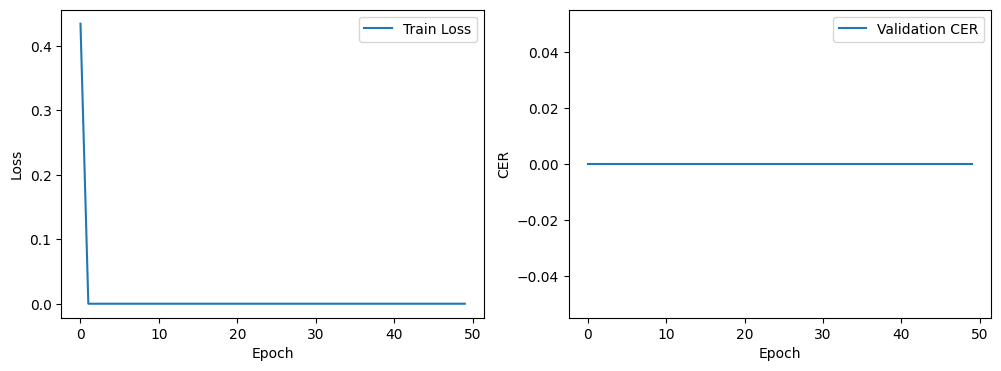

IsADirectoryError: [Errno 21] Is a directory: '/content/test'

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os
import editdistance
import matplotlib.pyplot as plt

class ArabicDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None, max_length=100):
        self.image_dir = image_dir
        self.transform = transform
        self.max_length = max_length

        self.data = []
        self.char_to_idx = {' ': 0}
        self.idx_to_char = {0: ' '}

        arabic_chars = 'ابتثجحخدذرزسشصضطظعغفقكلمنهوي'
        for char in arabic_chars:
            if char not in self.char_to_idx:
                idx = len(self.char_to_idx)
                self.char_to_idx[char] = idx
                self.idx_to_char[idx] = char

        with open(label_file, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split('\t')
            if len(parts) >= 2:
                image_name = parts[0].split('.')[0]
                label = parts[1]
                image_path = os.path.join(self.image_dir, f"{image_name}.png")
                if os.path.exists(image_path):
                    self.data.append((image_name, label))
                else:
                    print(f"Image file not found: {image_path}")
            else:
                print(f"Ignoring invalid line: {line.strip()}")

        print(f"Loaded {len(self.data)} valid image-label pairs")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_name, label = self.data[idx]
        image_path = os.path.join(self.image_dir, f"{image_name}.png")

        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        label_encoded = [self.char_to_idx.get(char, 0) for char in label[:self.max_length]]
        label_encoded += [0] * (self.max_length - len(label_encoded))

        return image, torch.tensor(label_encoded, dtype=torch.long)

class ResNetBiGRUAttention(nn.Module):
    def __init__(self, num_classes, hidden_size, max_length):
        super(ResNetBiGRUAttention, self).__init__()
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, hidden_size)

        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True, bidirectional=True)

        self.attention = nn.MultiheadAttention(hidden_size * 2, num_heads=8)

        self.fc = nn.Linear(hidden_size * 2, num_classes)

        self.max_length = max_length

    def forward(self, x):
        features = self.resnet(x)
        features = features.unsqueeze(1).repeat(1, self.max_length, 1)

        gru_out, _ = self.gru(features)

        attn_out, _ = self.attention(gru_out, gru_out, gru_out)

        output = self.fc(attn_out)

        return output

class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, input, target):
        ce_loss = F.cross_entropy(input, target, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.alpha is not None:
            alpha_t = self.alpha[target]
            focal_loss = alpha_t * focal_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

def arabic_transform():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(5),
        transforms.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=(0.95, 1.05)),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.view(-1, outputs.size(2)), labels.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

def validate(model, dataloader, idx_to_char, device):
    model.eval()
    total_cer = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 2)

            for pred, label in zip(predicted, labels):
                pred_text = ''.join([idx_to_char[idx.item()] for idx in pred if idx.item() in idx_to_char])
                label_text = ''.join([idx_to_char[idx.item()] for idx in label if idx.item() in idx_to_char])
                total_cer += editdistance.eval(pred_text, label_text) / len(label_text)

    return total_cer / len(dataloader.dataset)

def save_model(model, path):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

def load_model(model, path, device):
    model.load_state_dict(torch.load(path, map_location=device))
    model.eval()
    return model

def predict(model, image_path, transform, idx_to_char, device, max_length):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 2)

    predicted = predicted.squeeze().cpu().numpy()
    predicted_text = ''.join([idx_to_char[idx] for idx in predicted if idx in idx_to_char])
    return predicted_text[:max_length]

def plot_training_progress(train_losses, val_cers):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_cers, label='Validation CER')
    plt.xlabel('Epoch')
    plt.ylabel('CER')
    plt.legend()
    plt.show()

def main():
    # Parametreler
    image_dir = "/content/veri"
    label_file = "/content/veri/label.txt"
    batch_size = 32
    learning_rate = 0.001
    hidden_size = 256
    num_epochs = 50
    num_classes = len(ArabicDataset(image_dir, label_file).char_to_idx)
    max_length = 100

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Veri yükleme ve dönüştürme
    transform = arabic_transform()
    dataset = ArabicDataset(image_dir, label_file, transform=transform, max_length=max_length)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

    # Model oluşturma
    model = ResNetBiGRUAttention(num_classes=num_classes, hidden_size=hidden_size, max_length=max_length)
    model = model.to(device)

    criterion = FocalLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)

    # Eğitim
    best_cer = float('inf')
    train_losses = []
    val_cers = []

    for epoch in range(num_epochs):
        train_loss = train_epoch(model, dataloader, criterion, optimizer, device)
        val_cer = validate(model, dataloader, dataset.idx_to_char, device)

        train_losses.append(train_loss)
        val_cers.append(val_cer)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Validation CER: {val_cer:.4f}')

        scheduler.step(val_cer)

        if val_cer < best_cer:
            best_cer = val_cer
            save_model(model, 'best_arabic_model.pth')

    plot_training_progress(train_losses, val_cers)

    # Test
    test_image_path = "/content/test"
    best_model = load_model(model, 'best_arabic_model.pth', device)
    prediction = predict(best_model, test_image_path, transform, dataset.idx_to_char, device, max_length)
    print(f"Prediction: {prediction}")

if __name__ == "__main__":
    main()

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
from tqdm import tqdm

# Arapça karakterler
arabic_chars = 'ابتثجحخدذرزسشصضطظعغفقكلمنهوي'
char_to_idx = {char: idx for idx, char in enumerate(arabic_chars, start=1)}
char_to_idx['PAD'] = 0  # Padding için
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

class KHATTDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        self.data = []

        split_file = os.path.join(root_dir, f'{split}.txt')
        with open(split_file, 'r', encoding='utf-8') as f:
            for line in f:
                img_path, label = line.strip().split('\t')
                self.data.append((img_path, label))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        img = Image.open(os.path.join(self.root_dir, 'Images', img_path)).convert('L')

        if self.transform:
            img = self.transform(img)

        label_encoded = [char_to_idx.get(c, 0) for c in label]
        return img, torch.LongTensor(label_encoded)

class ArabicOCRModel(nn.Module):
    def __init__(self, num_chars):
        super(ArabicOCRModel, self).__init__()
        self.cnn = models.resnet18(pretrained=True)
        self.cnn.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.cnn.fc = nn.Linear(self.cnn.fc.in_features, 256)
        self.lstm = nn.LSTM(256, 128, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(256, num_chars)

    def forward(self, x):
        batch_size = x.size(0)
        features = self.cnn(x)
        features = features.view(batch_size, 256, -1).permute(0, 2, 1)
        lstm_out, _ = self.lstm(features)
        output = self.fc(lstm_out)
        return output

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)

        input_lengths = torch.full((outputs.size(0),), outputs.size(1), dtype=torch.long)
        target_lengths = torch.sum(labels != 0, dim=1)

        loss = criterion(outputs.permute(1, 0, 2), labels, input_lengths, target_lengths)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, labels in tqdm(val_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            input_lengths = torch.full((outputs.size(0),), outputs.size(1), dtype=torch.long)
            target_lengths = torch.sum(labels != 0, dim=1)

            loss = criterion(outputs.permute(1, 0, 2), labels, input_lengths, target_lengths)
            total_loss += loss.item()
    return total_loss / len(val_loader)

def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Veri dönüşümleri
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485], std=[0.229])
    ])

    # Veri yükleyicileri
    train_dataset = KHATTDataset(root_dir='path/to/KHATT', split='train', transform=transform)
    val_dataset = KHATTDataset(root_dir='path/to/KHATT', split='val', transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

    # Model oluşturma
    model = ArabicOCRModel(num_chars=len(char_to_idx)).to(device)

    # Loss ve optimizer
    criterion = nn.CTCLoss(blank=0, zero_infinity=True)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Eğitim döngüsü
    num_epochs = 50
    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        val_loss = evaluate(model, val_loader, criterion, device)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        # Model kaydetme
        if (epoch + 1) % 10 == 0:
            torch.save(model.state_dict(), f'arabic_ocr_model_epoch_{epoch+1}.pth')

    print("Eğitim tamamlandı!")

if __name__ == '__main__':
    main()